In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [3]:
data = pd.read_csv('../data/curated/fraud/merchant_fraud.csv')

In [4]:
train, valtest = train_test_split(data, train_size=0.7, random_state=19260817)
val, test = train_test_split(valtest, train_size=0.5, random_state=19260817)

In [5]:
selectk_F = SelectKBest(f_regression, k=8)

selectk_F.fit(train.drop(['merchant_abn', 'fraud_probability'], axis=1), train['fraud_probability'])


SelectKBest(k=8, score_func=<function f_regression at 0x7ff1799e83a0>)

In [6]:
# get the ranked feature names and scores
kbest_scores1 = pd.DataFrame({'features': selectk_F.get_feature_names_out(), 'scores': selectk_F.scores_})
kbest_scores1 = kbest_scores1.sort_values('scores', ascending=False)
kbest_scores1

,features,scores
7,transact_amount_perOrder_ratio,107.200645
3,transact_amount_perOrder_sd,7.910217
2,#distinct_customers,3.938528
1,#daily_orders,3.913581
0,transact_amount_perOrder,2.553695
5,#distinct_customers_ratio,1.268764
4,#daily_orders_ratio,1.256115
6,transact_amount_perOrder_sd_ratio,0.009893


In [7]:
SELECTED_FEATURES = kbest_scores1['features'][:2]

In [8]:
import matplotlib.pyplot as plt

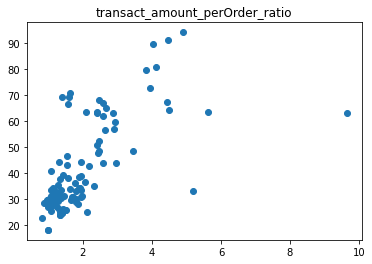

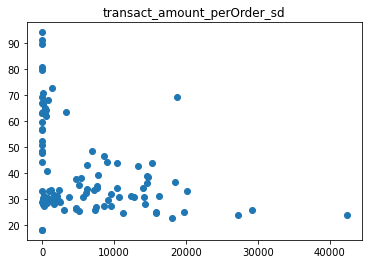

In [9]:
for selected_feature in SELECTED_FEATURES:
    plt.scatter(data[selected_feature], data['fraud_probability'])
    plt.title(selected_feature)
    plt.show()

# RFR

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rfr = RandomForestRegressor(random_state=19260817)

In [12]:
rfr.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

RandomForestRegressor(random_state=19260817)

In [13]:
rfr.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

0.9497419005387742

In [14]:
rfr.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

0.8955890650700566

In [15]:
rfr.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

0.11309379783180806

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

LinearRegression()

In [19]:
lr.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

0.6272701000242052

In [20]:
lr.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

-0.28617116500375706

In [21]:
lr.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

-0.5088204405401999

# Neural Network

In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
mlp = MLPRegressor(hidden_layer_sizes=(1), activation='logistic', random_state=19260817)

In [24]:
mlp.fit(train[list(SELECTED_FEATURES)], train['fraud_probability'])

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=1, random_state=19260817)

In [25]:
mlp.score(train[list(SELECTED_FEATURES)], train['fraud_probability'])

-5.573169734910749

In [26]:
mlp.score(val[list(SELECTED_FEATURES)], val['fraud_probability'])

-4.372815643765277

In [27]:
mlp.score(test[list(SELECTED_FEATURES)], test['fraud_probability'])

-8.120473994082381